In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

# 生成混合高斯分布

In [2]:
def generate_gaussian(size = 1000, num_classes = 3, overlap = False, dim_var = False, cov = False):
    mean = np.array([10, 15])
    covariance = np.array([[1000, 0], [0, 1000]])
    if(overlap):
        covariance = np.array([[1, 0], [0, 1]])
    mus = np.random.multivariate_normal(mean, covariance, size = num_classes) 
    data = []
    label = []
    lap = size//num_classes
    for i, mu in enumerate(mus):
        _size = np.min([(i+1)*lap, size]) - i*lap
        sigma = None
        tmp = 0.5*np.random.rand(2, 2)
        tmp = np.dot(tmp, tmp.transpose())
        tmp = tmp+tmp.T
        if(dim_var and cov):
            sigma = tmp
        elif(dim_var):
            sigma = np.array([[tmp[0, 0], 0], [0, tmp[1, 1]]])
        elif(cov):
            max_tmp = np.max([tmp[0,0], tmp[1,1]])
            sigma = np.array([[max_tmp, tmp[0,1]], [tmp[1,0], max_tmp]])
        else:
            sigma = np.array([[tmp[0,0], 0], [0, tmp[0,0]]])
        
        data.append(np.random.multivariate_normal(mu, sigma, size = _size))
        label.append(i+np.zeros((_size, 1)))
    
    data = np.concatenate(data, axis=0)
    label = np.concatenate(label, axis=0)
    return data, label

In [3]:
def plot_data(datas, labels, title = None):
    plt.figure(figsize=(10, 10))
    colors = ["red", "green", "blue", "orange", "purple", "black"]
    for i, label in enumerate(np.unique(labels)):
        idx = np.where(labels[:,0]==label)[0]
        la = str(i)
        plt.plot(datas[idx, 0], datas[idx, 1],"." , color = colors[i], label = la)
    plt.legend()
    if(title is not None):
        plt.title(title)
    plt.show()

In [4]:
def scree_plot(datas, labels, title = None):
    SSEs = []
    ks = list(range(2, 10))
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(datas)
        SSEs.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,10))
    plt.xlabel("n_clusters")
    plt.ylabel("SSE")
    plt.plot(ks, SSEs)
    if(title is not None):
        plt.title(title)
    plt.show()

In [5]:
np.random.seed(1314)

# overlap很小的混合高斯分布

In [6]:
datas1, labels1 = generate_gaussian(size = 10000, num_classes = 6, overlap = False, dim_var = False, cov = False)

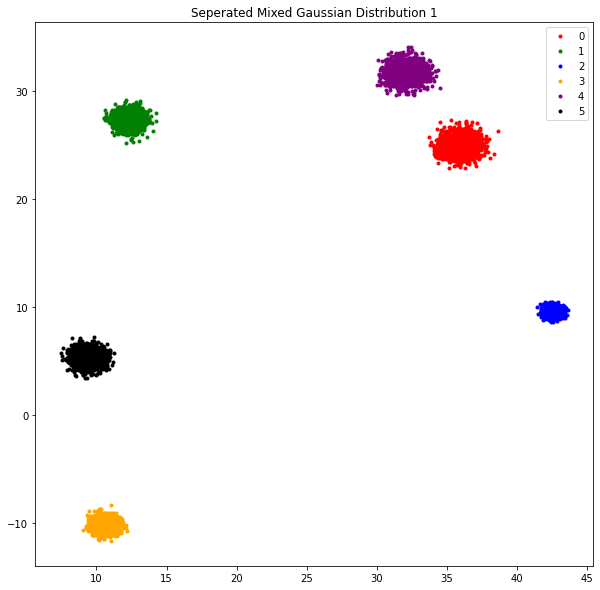

In [7]:
plot_data(datas1, labels1, "Seperated Mixed Gaussian Distribution 1")

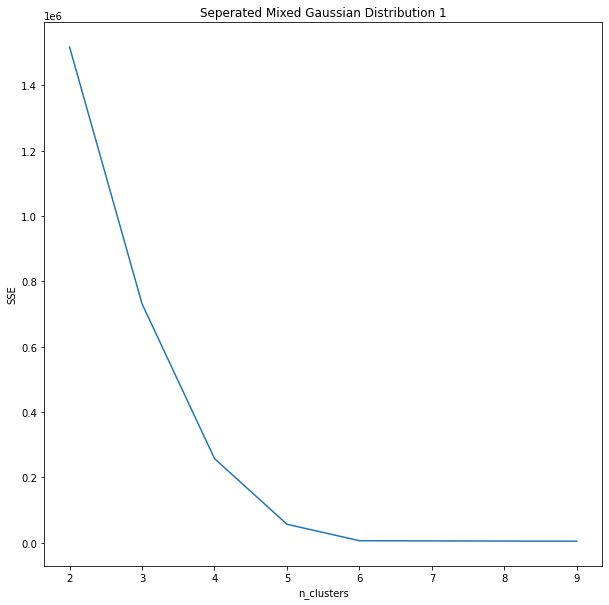

In [8]:
scree_plot(datas1, labels1, "Seperated Mixed Gaussian Distribution 1")

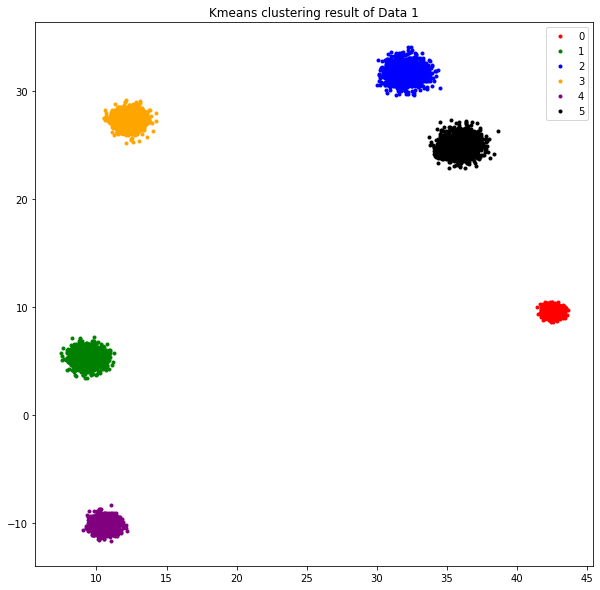

In [9]:
kmeans1 = KMeans(n_clusters=6, random_state=42)
kmeans1.fit(datas1)
plot_data(datas1, kmeans1.labels_.reshape((-1,1)), "Kmeans clustering result of Data 1")

In [10]:
datas2, labels2 = generate_gaussian(size = 10000, num_classes = 6, overlap = False, dim_var = False, cov = False)

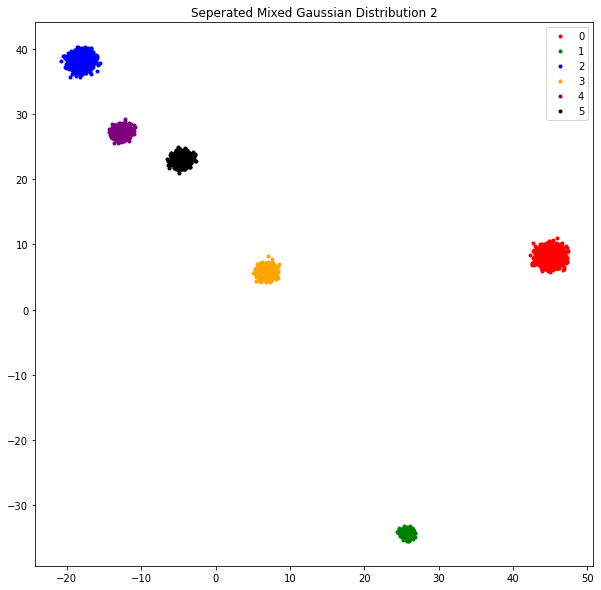

In [11]:
plot_data(datas2, labels2, "Seperated Mixed Gaussian Distribution 2")

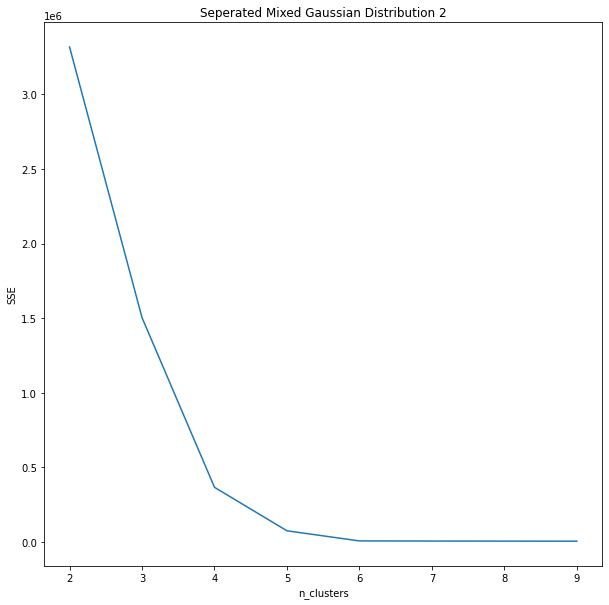

In [12]:
scree_plot(datas2, labels2, "Seperated Mixed Gaussian Distribution 2")

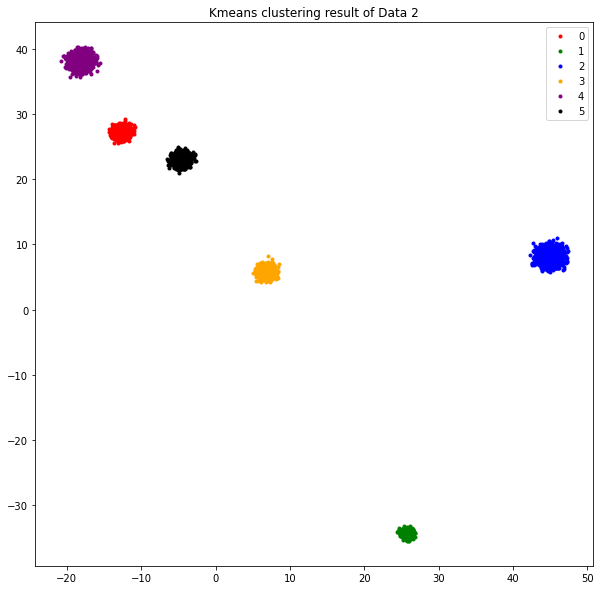

In [13]:
kmeans2 = KMeans(n_clusters=6, random_state=42)
kmeans2.fit(datas2)
plot_data(datas2, kmeans2.labels_.reshape((-1,1)), "Kmeans clustering result of Data 2")

# overlap很大的混合高斯分布

In [14]:
datas3, labels3 = generate_gaussian(size = 10000, num_classes = 3, overlap = True, dim_var = False, cov = False)

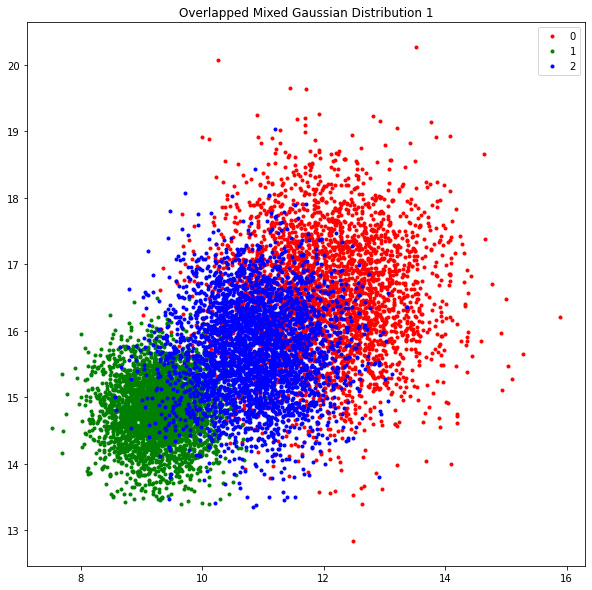

In [15]:
plot_data(datas3, labels3, "Overlapped Mixed Gaussian Distribution 1")

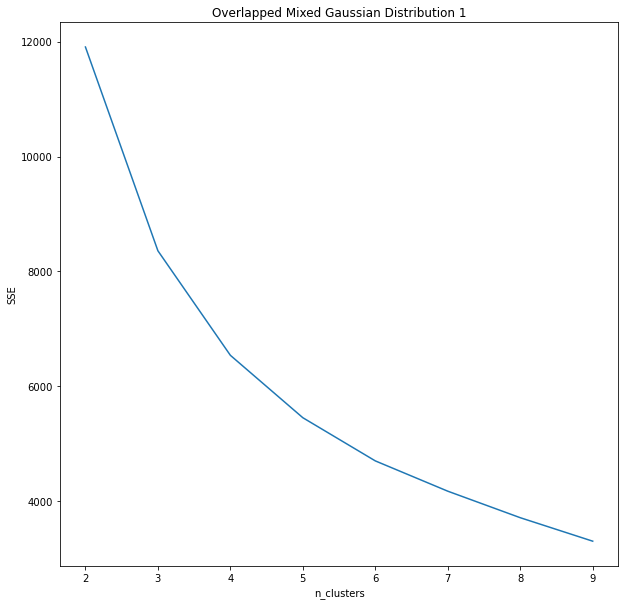

In [16]:
scree_plot(datas3, labels3, "Overlapped Mixed Gaussian Distribution 1")

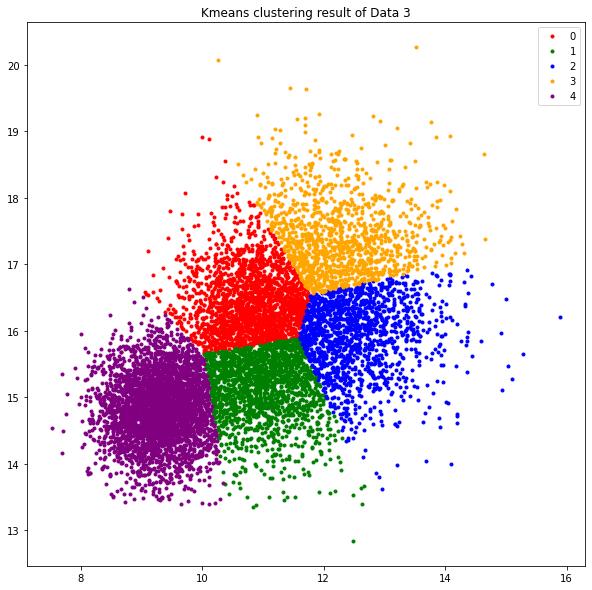

In [17]:
kmeans3 = KMeans(n_clusters=5, random_state=42)
kmeans3.fit(datas3)
plot_data(datas3, kmeans3.labels_.reshape((-1,1)), "Kmeans clustering result of Data 3")

In [18]:
datas4, labels4 = generate_gaussian(size = 10000, num_classes = 3, overlap = True, dim_var = False, cov = False)

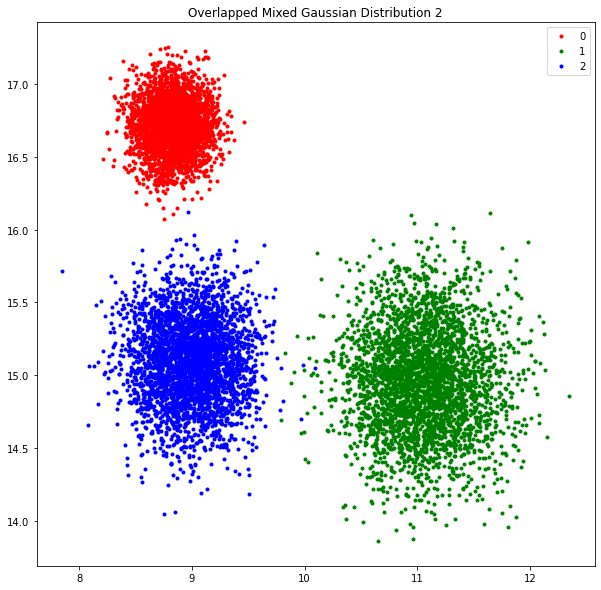

In [19]:
plot_data(datas4, labels4, "Overlapped Mixed Gaussian Distribution 2")

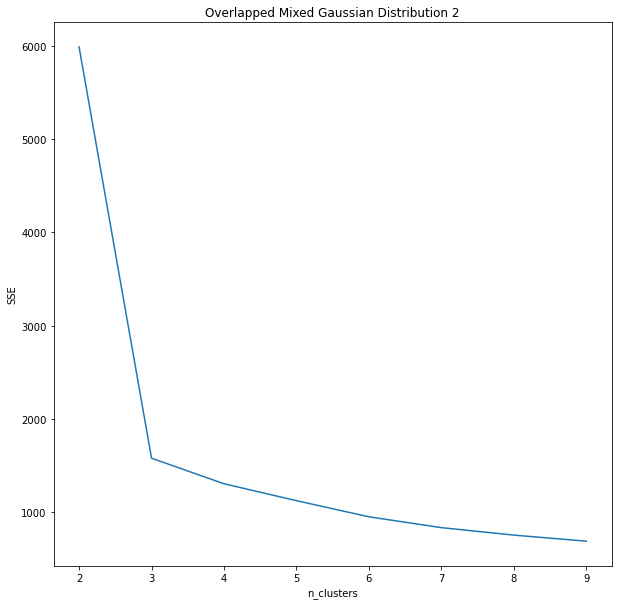

In [20]:
scree_plot(datas4, labels4, "Overlapped Mixed Gaussian Distribution 2")

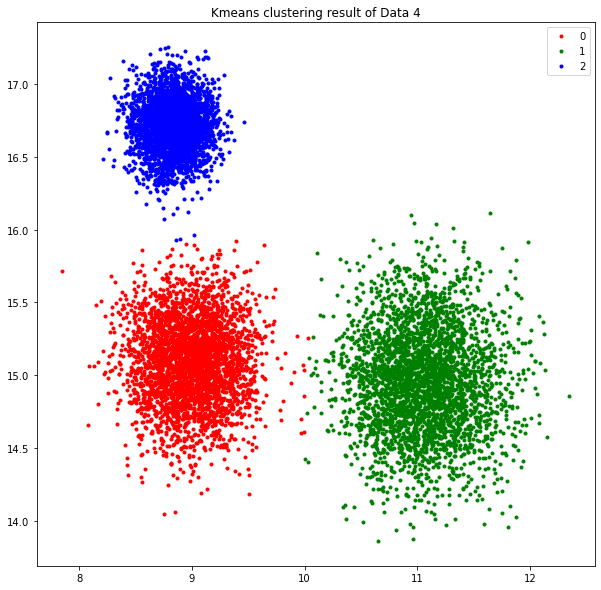

In [21]:
kmeans4 = KMeans(n_clusters=3, random_state=42)
kmeans4.fit(datas4)
plot_data(datas4, kmeans4.labels_.reshape((-1,1)), "Kmeans clustering result of Data 4")

# 维度方差不同且协方差非零的单个高斯分布

In [22]:
datas5, labels5 = generate_gaussian(size = 10000, num_classes = 1, overlap = False, dim_var = True, cov = True)

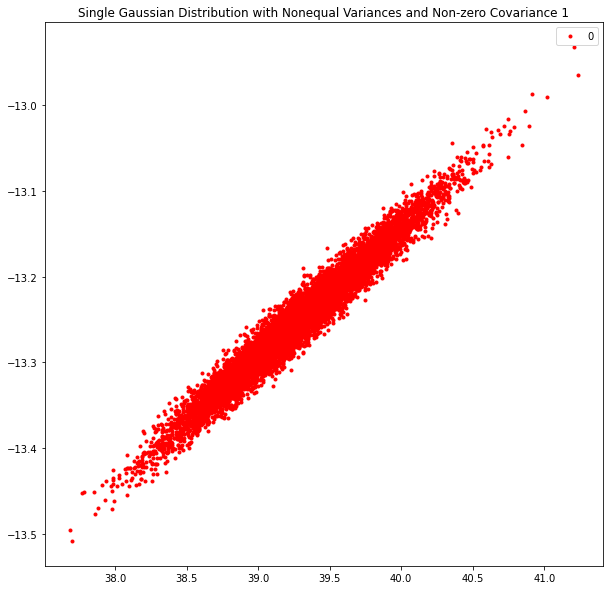

In [23]:
plot_data(datas5, labels5, "Single Gaussian Distribution with Nonequal Variances and Non-zero Covariance 1")

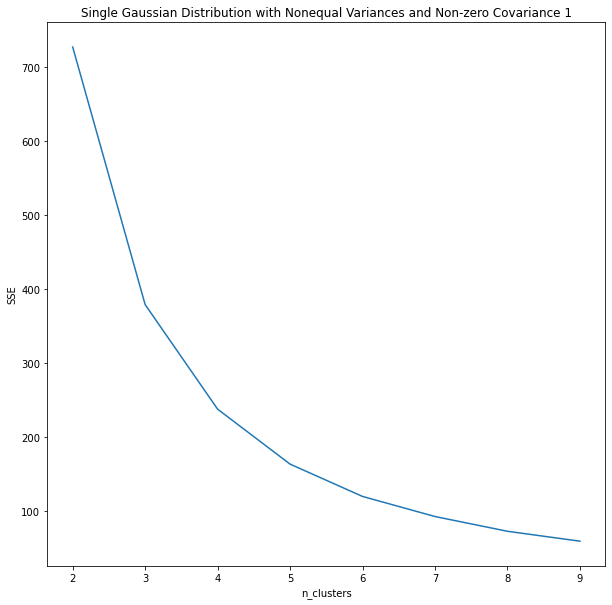

In [24]:
scree_plot(datas5, labels5, "Single Gaussian Distribution with Nonequal Variances and Non-zero Covariance 1")

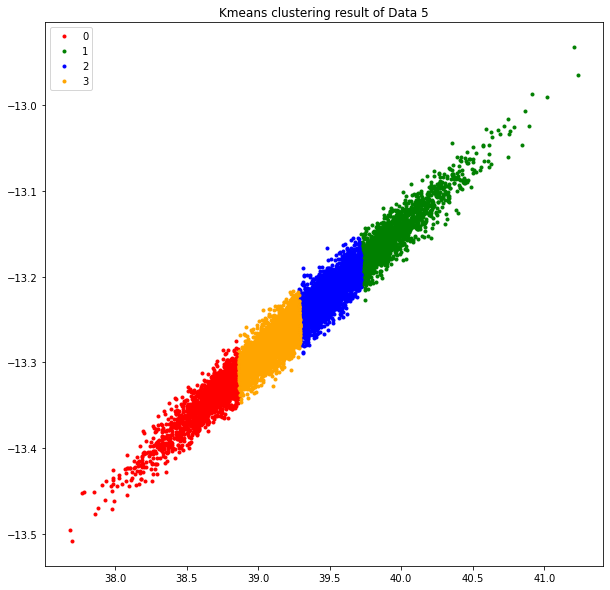

In [25]:
kmeans5 = KMeans(n_clusters=4, random_state=42)
kmeans5.fit(datas5)
plot_data(datas5, kmeans5.labels_.reshape((-1,1)), "Kmeans clustering result of Data 5")

In [26]:
datas6, labels6 = generate_gaussian(size = 10000, num_classes = 1, overlap = False, dim_var = True, cov = True)

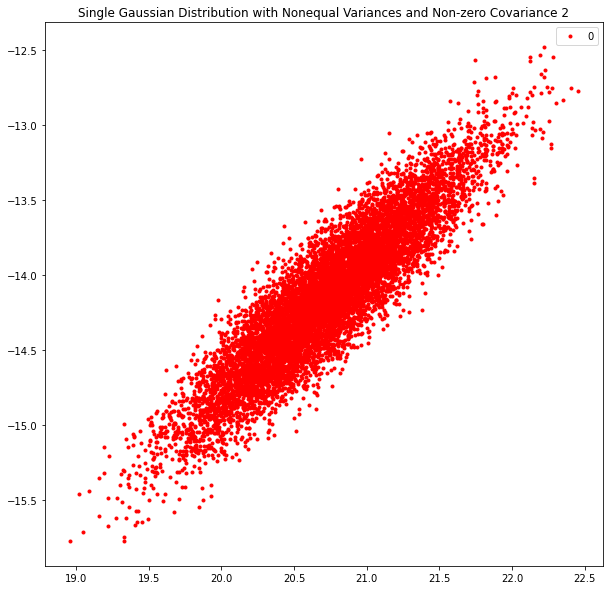

In [27]:
plot_data(datas6, labels6, "Single Gaussian Distribution with Nonequal Variances and Non-zero Covariance 2")

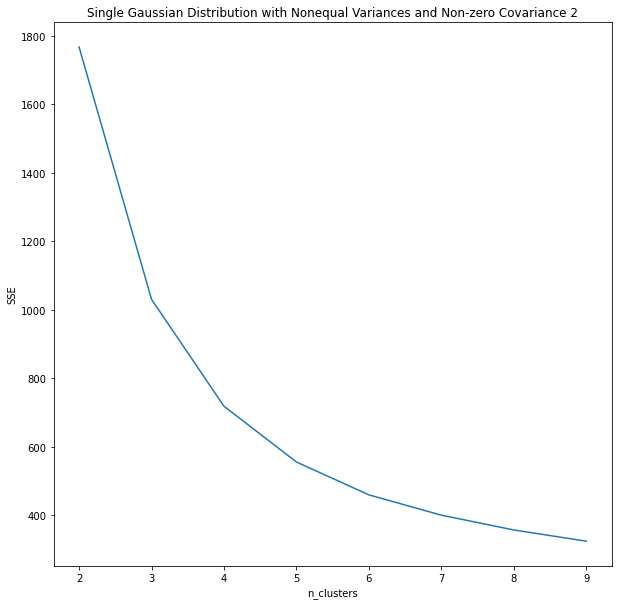

In [28]:
scree_plot(datas6, labels6, "Single Gaussian Distribution with Nonequal Variances and Non-zero Covariance 2")

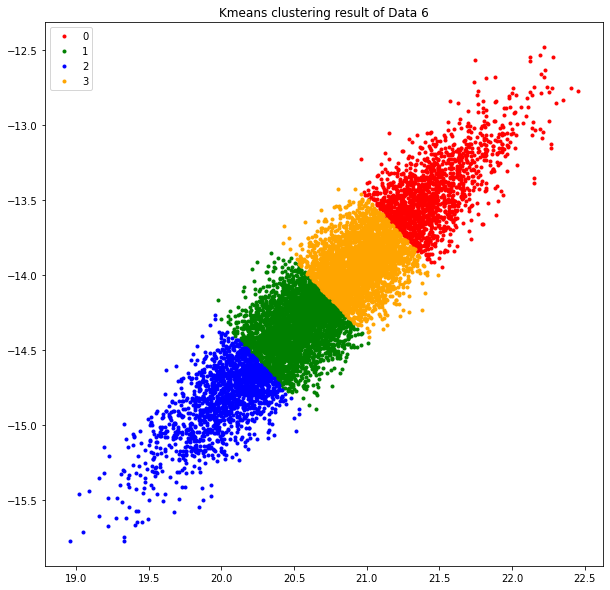

In [29]:
kmeans6 = KMeans(n_clusters=4, random_state=42)
kmeans6.fit(datas6)
plot_data(datas6, kmeans6.labels_.reshape((-1,1)), "Kmeans clustering result of Data 6")

# 维度方差不同且协方差非零的混合高斯分布

In [30]:
datas7, labels7 = generate_gaussian(size = 10000, num_classes = 3, overlap = False, dim_var = True, cov = True)

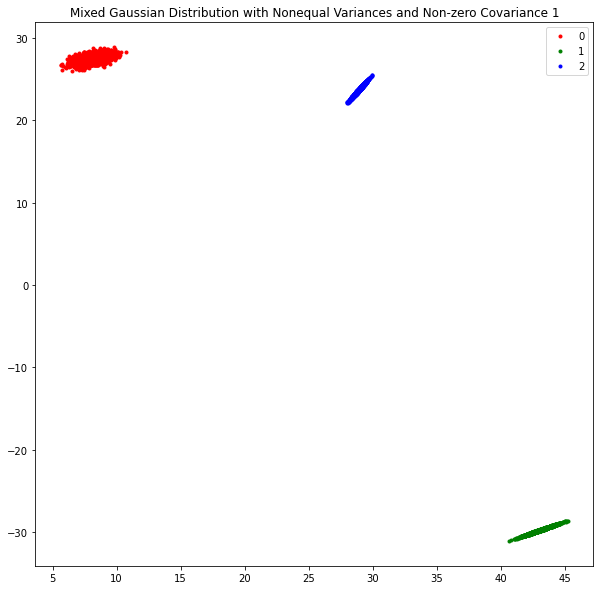

In [31]:
plot_data(datas7, labels7, "Mixed Gaussian Distribution with Nonequal Variances and Non-zero Covariance 1")

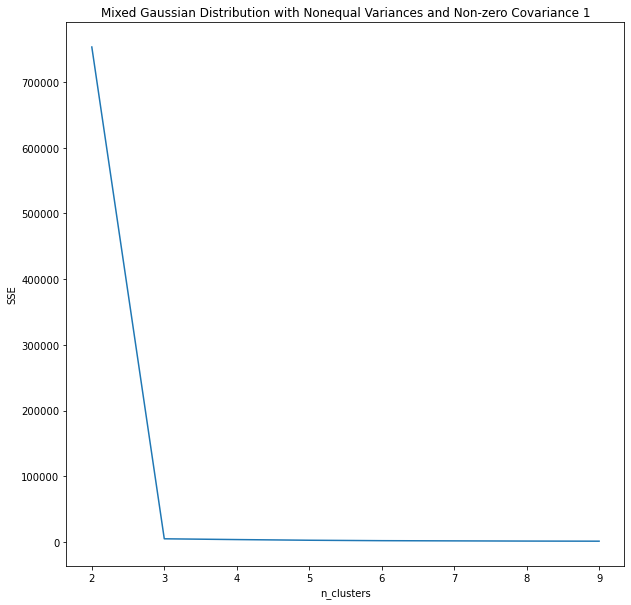

In [32]:
scree_plot(datas7, labels7, "Mixed Gaussian Distribution with Nonequal Variances and Non-zero Covariance 1")

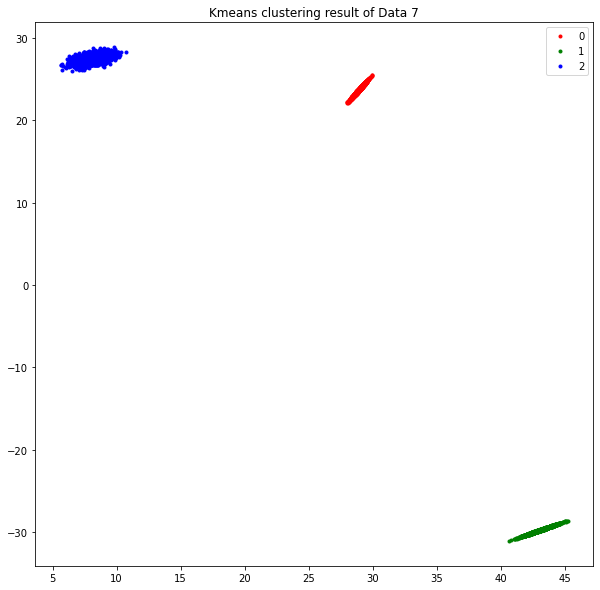

In [33]:
kmeans7 = KMeans(n_clusters=3, random_state=42)
kmeans7.fit(datas7)
plot_data(datas7, kmeans7.labels_.reshape((-1,1)), "Kmeans clustering result of Data 7")

In [34]:
datas8, labels8 = generate_gaussian(size = 10000, num_classes = 3, overlap = True, dim_var = True, cov = True)

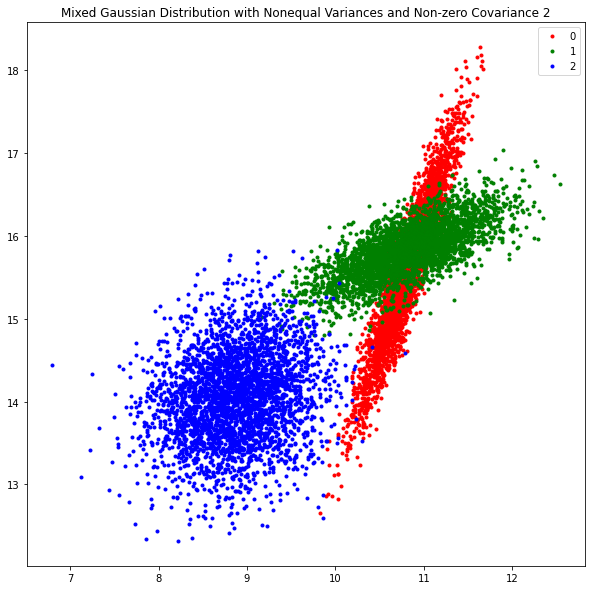

In [35]:
plot_data(datas8, labels8, "Mixed Gaussian Distribution with Nonequal Variances and Non-zero Covariance 2")

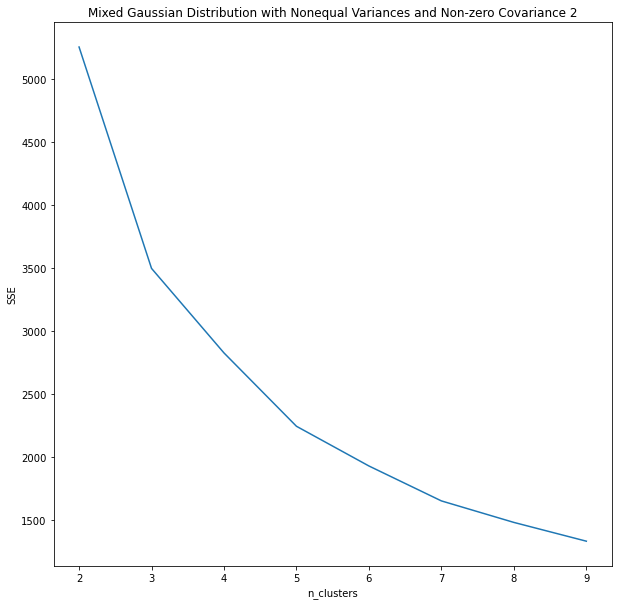

In [36]:
scree_plot(datas8, labels8, "Mixed Gaussian Distribution with Nonequal Variances and Non-zero Covariance 2")

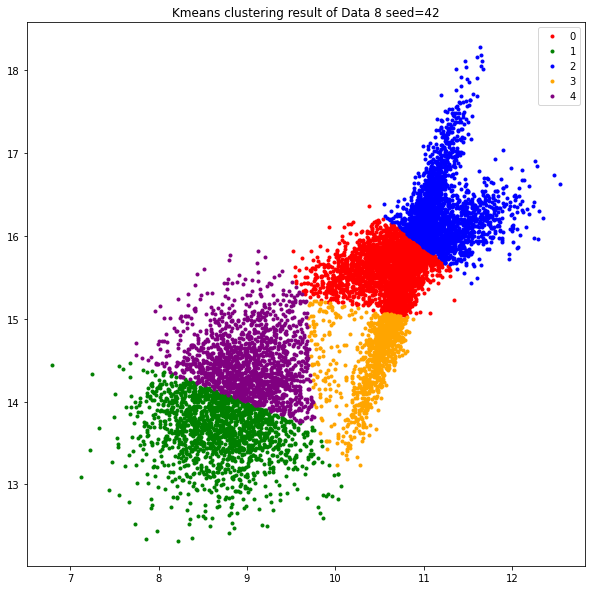

In [42]:
kmeans8 = KMeans(n_clusters=5, random_state=42)
kmeans8.fit(datas8)
plot_data(datas8, kmeans8.labels_.reshape((-1,1)), "Kmeans clustering result of Data 8 seed=42")

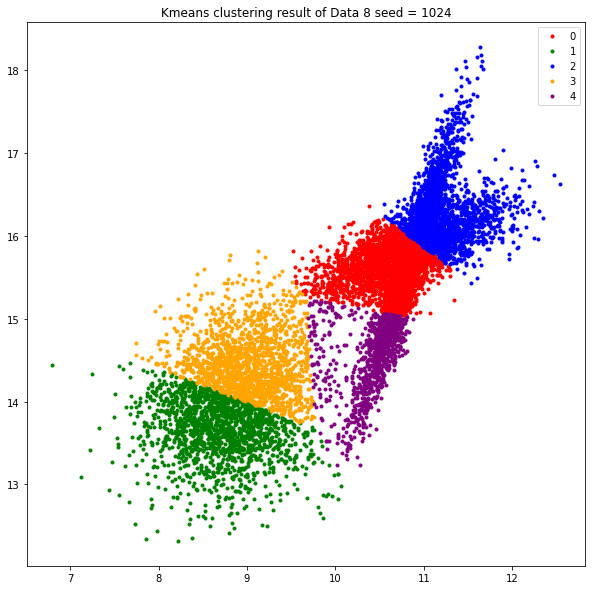

In [43]:
kmeans9 = KMeans(n_clusters=5, random_state=1024)
kmeans9.fit(datas8)
plot_data(datas8, kmeans9.labels_.reshape((-1,1)), "Kmeans clustering result of Data 8 seed = 1024")

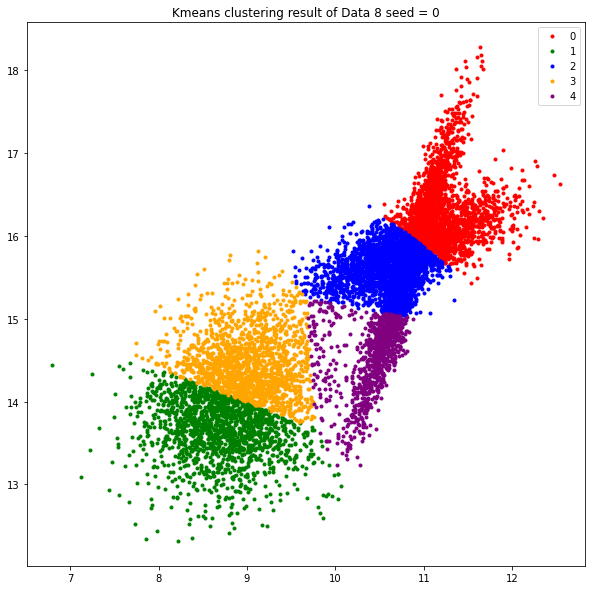

In [44]:
kmeans10 = KMeans(n_clusters=5, random_state=0)
kmeans10.fit(datas8)
plot_data(datas8, kmeans10.labels_.reshape((-1,1)), "Kmeans clustering result of Data 8 seed = 0")

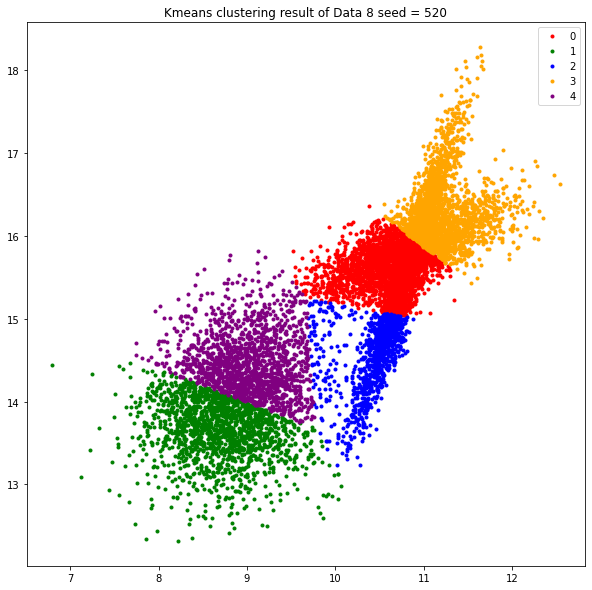

In [45]:
kmeans11 = KMeans(n_clusters=5, random_state=520)
kmeans11.fit(datas8)
plot_data(datas8, kmeans11.labels_.reshape((-1,1)), "Kmeans clustering result of Data 8 seed = 520")